# Lecture 5: Probability

#### Note: This lecture is to visually demonstrate the lecture materials. The goal is not to understand every line of code
#### The goal is not to understand every line of code

# A.1 Import libraries

In [18]:
library(dplyr) #data manipulation
library(ggplot2) #graphing
library(ggthemes) #graphing
options(warn=-1) #Hide warnings

### A.1.1 If there is an error you must download the packages
- Generally speaking you only need to do this one time

## Outline

1. [Probability](#Section_1)
3. [Application](#Section_3)

<a id='Section_1'></a>
# 1. Probability
- See lecture notes

## 1.1 Coin flip

In [1]:
#Coin input
num_flips = 100
coin = c('heads', 'tails')

# Random sample
flips = sample(coin, size = num_flips, replace = TRUE)

# Table
freqs <- table(flips)
freqs

flips
heads tails 
   53    47 

## 1.2 Coin flip function
- Code adapted from [here](https://www.gastonsanchez.com/packyourcode/function.html)

In [39]:
# Description: Counts number of head in given number of tosses
# Inputs
#   times: How many coin flips
# Output
#   head_count: number of heads in given number of tosses

head_counter <- function(times = 1) {
    #Coin input
    coin <- c('heads', 'tails')
    prob = c(.5,.5)
    #Sample function
    sample = sample(coin, size = times, replace = TRUE, prob = prob)
    #Count number of heads
    head_count = sum(as.numeric(sample=='heads'))
    #Output head count
    return (head_count)
}

### 1.2.1 Simulate coin flip
- Change the number inside the head_counter function

In [51]:
#head_counter(1000)
#head_counter(100)
head_counter(2)

[1] 1

### 1.2.2 Simulate many coin flips

In [66]:
all_experiments = vector(mode = "list", length = 1000)

for (toss in 1:1000){
    all_experiments[toss] = head_counter(toss)/toss
}

#### 1.2.2.1 Plot many coin flips

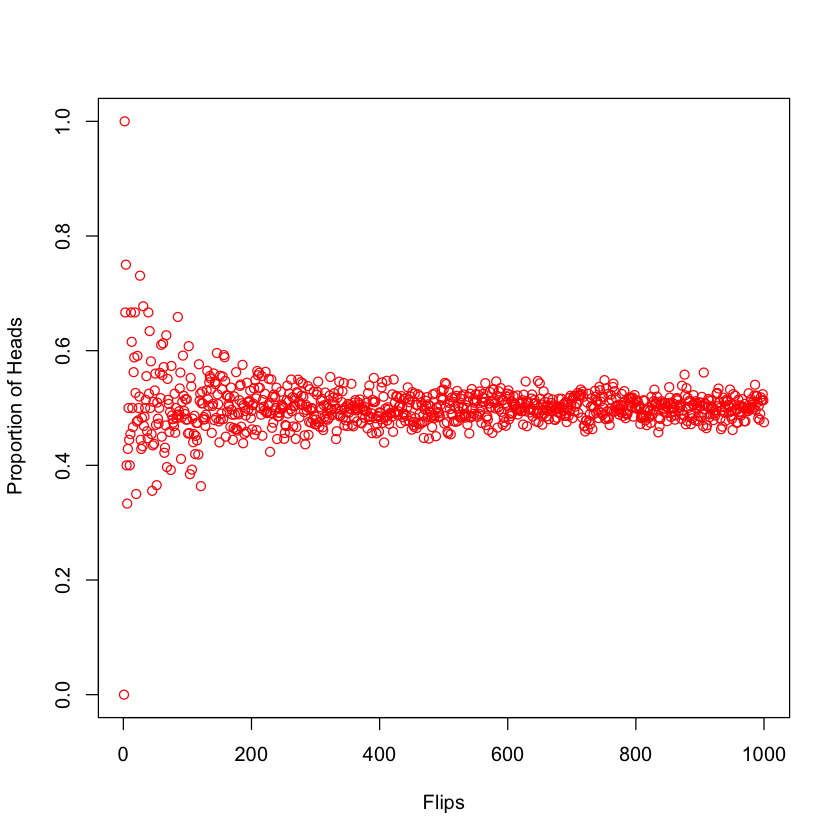

In [67]:
x = c(1:1000)
y = all_experiments 
plot(x,
     y,
     xlab='Flips',
     ylab=' Proportion of Heads',
     col='red'
    )

# 2. Application 

## 2.1 Monty hall problem
- Code adapted from [here](https://www.r-bloggers.com/monty-hall-by-simulation-in-r/)

In [80]:
rm(list=ls())
monty<-function(strat='stay',N=1000,print_games=TRUE)
{
 doors<-1:3 #initialize the doors behind one of which is a good prize
 win<-0 #to keep track of number of wins

for(i in 1:N)
 {
 prize<-floor(runif(1,1,4)) #randomize which door has the good prize
 guess<-floor(runif(1,1,4)) #guess a door at random

## Reveal one of the doors you didn't pick which has a bum prize
 if(prize!=guess)
 reveal<-doors[-c(prize,guess)]
 else
 reveal<-sample(doors[-c(prize,guess)],1)

 ## Stay with your initial guess or switch
 if(strat=='switch')
 select<-doors[-c(reveal,guess)]
 if(strat=='stay')
 select<-guess
 if(strat=='random')
 select<-sample(doors[-reveal],1)

## Count up your wins
 if(select==prize)
 {
 win<-win+1
 outcome<-'Winner!'
 }else
 outcome<-'Losser!'
 }

 cat(paste('Using the ',strat,' strategy, your win percentage was ',win/N*100,'%\n',sep='')) #Print the win percentage of your strategy
}

In [81]:
monty(strat="stay")

Using the stay strategy, your win percentage was 32.4%
